In [3]:
!pip install graphviz
!pip install pydotplus

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 31.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24552 sha256=f9266377825c404e395963d020a7b572af4064c7f3be93711cc2bf13be49b9c4
  Stored in directory: /home/onyxia/.cache/pip/wheels/bd/ce/e8/ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus


In [4]:
#import de packages
import graphviz
import pydotplus


In [61]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [8]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [13]:
X = data

In [15]:
y = target

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=17)

In [20]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
from sklearn import tree

In [21]:
dt

DecisionTreeRegressor(random_state=0)

In [27]:
dt.tree_.node_count

715

In [33]:
dt.score(X_train,y_train)

1.0

In [30]:
values = dt.tree_.value

In [32]:
print(values[0,0,0])

22.398680738786286


NameError: name 'plt' is not defined

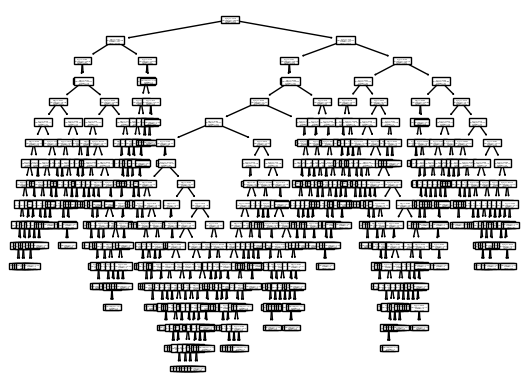

In [24]:
tree.plot_tree(dt)

In [40]:
def tree_summary(decision_tree, X_training=X_train, y_training=y_train, X_test=X_test, y_test=y_test):
    """function to comment on a decision tree, that gives its score, its depth and how many nodes they are

    Parameters
    -----------------------
    decision_tree : a trained decision tree

    X_training, y_training : array-like objects
    training sub datasets used to train the decision tree

    X_test, y_test :
    the sub datasets used to test the decision tree
    -----------------------
    """
    nb_nodes = decision_tree.tree_.node_count
    depth = decision_tree.tree_.max_depth
    learning_score = decision_tree.score(X_training, y_training)
    test_score = decision_tree.score(X_test, y_test)
    return nb_nodes, depth, learning_score, test_score

In [41]:
tree_summary(decision_tree=dt)

(715, 17, 1.0, 0.8326570877247362)

Risque de sur apprentissage parce que le score est de 1, et on remarque que ça baisse pour le teste donc que c'est pas top top.

### Question 2

In [42]:
dt2 = DecisionTreeRegressor(random_state=0, max_depth=3).fit(X_train, y_train)

In [43]:
tree_summary(dt2)

(15, 3, 0.8160045697821083, 0.7311557939115028)

On remarque que son score d'apprentissage est moins bon, et que son score de test aussi, mais on se doute qu'il est plus réaliste parce qu'il n'a 'que' 15 noeuds.

In [46]:
from IPython.display import Image
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

[Text(0.5, 0.875, 'x[12] <= 7.475\nsquared_error = 86.651\nsamples = 379\nvalue = 22.399'),
 Text(0.25, 0.625, 'x[5] <= 7.437\nsquared_error = 84.099\nsamples = 102\nvalue = 32.788'),
 Text(0.125, 0.375, 'x[7] <= 1.485\nsquared_error = 39.05\nsamples = 81\nvalue = 29.399'),
 Text(0.0625, 0.125, 'squared_error = 0.0\nsamples = 3\nvalue = 50.0'),
 Text(0.1875, 0.125, 'squared_error = 23.601\nsamples = 78\nvalue = 28.606'),
 Text(0.375, 0.375, 'x[10] <= 19.65\nsquared_error = 42.625\nsamples = 21\nvalue = 45.862'),
 Text(0.3125, 0.125, 'squared_error = 14.612\nsamples = 20\nvalue = 47.06'),
 Text(0.4375, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 21.9'),
 Text(0.75, 0.625, 'x[12] <= 15.0\nsquared_error = 33.207\nsamples = 277\nvalue = 18.573'),
 Text(0.625, 0.375, 'x[7] <= 1.207\nsquared_error = 19.704\nsamples = 152\nvalue = 21.918'),
 Text(0.5625, 0.125, 'squared_error = 0.0\nsamples = 1\nvalue = 50.0'),
 Text(0.6875, 0.125, 'squared_error = 14.577\nsamples = 151\nvalue = 21.732'

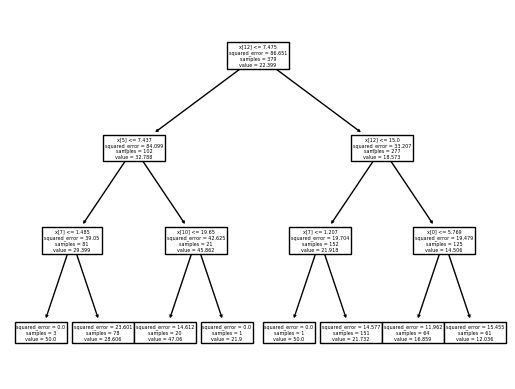

In [47]:
tree.plot_tree(dt2)

C'est un peu moche mais on le voit quand même.

En fait on essaie à chaque étape de réduire la fonction de perte, on peut prendre le MSE par exemple. 

Et à la fin, on prédit la valeur moyenne des Y .

In [48]:
dt2.n_features_in_

13

In [49]:
dt2.feature_names_in_

AttributeError: 'DecisionTreeRegressor' object has no attribute 'feature_names_in_'

In [51]:
X.shape

(506, 13)

Elles y passent toutes?

### Question 4

In [66]:
max_depth = []
learning_score = []
test_score = []
for i in [1,2,3,4,5,6,7,8,9,10]:
    X_train_boucle, X_test_boucle, y_train_boucle, y_test_boucle = train_test_split(X,y)
    dt_test = DecisionTreeRegressor(random_state=0, max_depth=i).fit(X_train_boucle, y_train_boucle)
    dt_summary_boucle = tree_summary(dt_test,X_training=X_train_boucle, y_training=y_train_boucle, y_test=y_test_boucle)
    score_app = dt_summary_boucle[2]
    score_test = dt_summary_boucle[3]
    learning_score.append(score_app)
    test_score.append(score_test)
    max_depth.append(i)


In [67]:
max_depth = np.array(max_depth)
learning_score = np.array(learning_score)
test_score = np.array(test_score)

In [68]:
max_depth

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

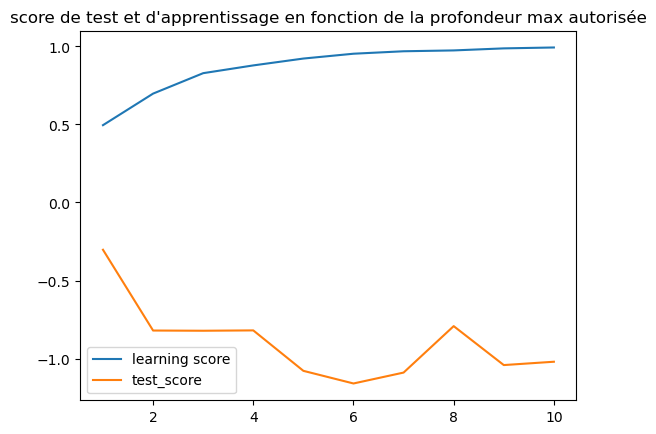

In [74]:
plt.plot(max_depth,learning_score, label = 'learning score')
plt.plot(max_depth,test_score, label='test_score')
plt.title("score de test et d'apprentissage en fonction de la profondeur max autorisée")
plt.legend()
plt.show()

Au bon pifomètre on peut se dire que le score est le plus élevé quand la profondeur est petite, c'est une méthode un peu artisanale.
Sinon il faudrait utiliser un module avec grid qq chose. 
#### GridSearchCV